In [1]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import time
import sys
import gc
import tensorflow as tf
from random import randint
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import manifold, datasets


# read mask

(480, 640, 3)


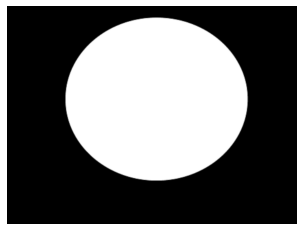

In [2]:
mask = np.array(cv2.imread('mask.png'))/255
print(mask.shape)
plt.imshow(mask,plt.cm.gray)
plt.axis("off");plt.show()

# read file for `white` picture

In [3]:
def read_while_file():
    print("reading data of white...")
    file_path='d:/Special_topic/pleurotus_eryngii/white/*'
    file_name = glob.glob(file_path)
    file_num = len(file_name)

    data = np.zeros((file_num,375,420,3),dtype=np.uint8)

    for i in range(file_num):
        data[i] = (cv2.imread(file_name[i]) * mask )[20:-85,120:-100]

    ## plot image for white data
    # plt.figure(figsize=(10,5))
    # for i in range(file_num):
    #     plt.subplot(3,3,i+1)
    #     plt.axis("off")
    #     plt.title(file_name[i])
    #     plt.imshow(cv2.cvtColor(data[i], cv2.COLOR_BGR2RGB))
    # plt.show()

    print("reading data of white sucessful\n")
    return data


white_data = read_while_file()


reading data of white...


reading data of white sucessful



# read file for `data` picture

In [4]:
def read_data_file():
    print("reading data....")

    ## read file path
    ## file path 1030 1104 1108 1118 1122
    file_path='d:/Special_topic/pleurotus_eryngii/*'
    folder_name = glob.glob(file_path)[:5]
    file_name=[]
    for folder_name in folder_name:
        count = 0
        for fname in glob.glob(folder_name+"/*"):
            file_name.append(fname)
            count+=1
            if(count==9*5):
                pass
                # break
    print("file_name number: ",len(file_name))
    print("data all Group number: ",len(file_name)//9)

    data_Gnum = len(file_name)//9
    print("data_Gnum = ", data_Gnum)

    ## [data_Gnum][NumOfPicture][picture(480*640*wave)]
    data_black = np.zeros((data_Gnum,375,420,9),dtype=np.uint8)
    data       = np.zeros((data_Gnum,375,420,18),dtype=np.uint8)
    print("data_black.shpae = ",data_black.shape)
    print("data.shpae = ",data.shape)
    collected = gc.collect()
    print("Garbage collector: collected %d objects." % (collected))

    print("processing group")
    for group in range(data_Gnum):
        print("{}/{}".format(group+1,data_Gnum),end="\t")

        for black in range(3):
            img = cv2.imread(file_name[group*9+black]) * mask
            data_black[group][:,:,black*3:black*3+3] = img[20:-85,120:-100]

        for LED in range(6):
            img = cv2.imread(file_name[group*9+3+LED]) * mask
            data[group][:,:,LED*3:LED*3+3] = img[20:-85,120:-100]

    gc.collect()
    print("\nreading data sucessful\n")
    return data, data_black, data_Gnum

#=========================================================
data, data_black, data_Gnum = read_data_file()
print("data.type = ",type(data[0][0][0][0]))
print("data max = ", np.amax(data))
print("data max = ", np.amin(data))



reading data....
file_name number:  1296
data all Group number:  144
data_Gnum =  144
data_black.shpae =  (144, 375, 420, 9)
data.shpae =  (144, 375, 420, 18)


Garbage collector: collected 2255 objects.
processing group
1/144	

2/144	3/144	

4/144	5/144	

6/144	7/144	

8/144	9/144	

10/144	11/144	

12/144	13/144	

14/144	15/144	

16/144	17/144	

18/144	19/144	

20/144	21/144	

22/144	23/144	

24/144	25/144	

26/144	27/144	

28/144	29/144	

30/144	31/144	

32/144	33/144	

34/144	35/144	

36/144	37/144	

38/144	39/144	

40/144	41/144	

42/144	43/144	

44/144	45/144	

46/144	47/144	

48/144	49/144	

50/144	51/144	

52/144	53/144	

54/144	55/144	

56/144	57/144	

58/144	59/144	

60/144	61/144	

62/144	63/144	

64/144	65/144	

66/144	67/144	

68/144	69/144	

70/144	71/144	

72/144	73/144	

74/144	75/144	

76/144	77/144	

78/144	79/144	

80/144	81/144	

82/144	83/144	

84/144	85/144	

86/144	87/144	

88/144	89/144	

90/144	91/144	

92/144	93/144	

94/144	95/144	

96/144	97/144	

98/144	99/144	

100/144	101/144	

102/144	103/144	

104/144	105/144	

106/144	107/144	

108/144	109/144	

110/144	111/144	

112/144	113/144	

114/144	115/144	

116/144	117/144	

118/144	119/144	

120/144	121/144	

122/144	123/144	

124/144	125/144	

126/144	127/144	

128/144	129/144	

130/144	131/144	

132/144	133/144	

134/144	135/144	

136/144	137/144	

138/144	139/144	

140/144	141/144	

142/144	143/144	

144/144	


reading data sucessful

data.type =  <class 'numpy.uint8'>


data max =  255


data max =  0


In [5]:
# solve div0 question

# def div0( a, b ):
#     """ ignore / 0, div0( [-1, 0, 1], 0 ) -> [0, 0, 0] """
#     with np.errstate(divide='ignore', invalid='ignore'):
#         c = np.divide(a,b)
#         c[ ~ np.isfinite( c )] = 0  # -inf inf NaN
#     return c

def div0(a,b):
    b[b==0] = -1
    c = a/b
    c[c<0] = 0
    return c

def print_info(img):
    print("max =",np.amax(img))
    print("min =",np.amin(img))
    print("mean=",np.mean(img))

a = np.array([1.,0.,0.], dtype='float')
b = np.array([0.,1.,0.], dtype='float')
c = div0(a,b)
print(div0(a,b))

[ 0.  0. -0.]


# calculate reflectivity

In [6]:
## initialization
# [data_Gnum][NumOfPicture(LED)][picture(480*640*3)]
data = data.astype('float')
white_data = white_data.astype('float')
reflectivity = np.zeros_like(data, dtype='float')
print("reflectivity.shape=", reflectivity.shape)
print()

dark_30 = white_data[2]
dark_40 = white_data[0]
dark_100= white_data[1]
# print("dark_100.shape=",dark_100.shape)

LED1_white = white_data[3]
LED2_white = white_data[4]
LED3_white = white_data[5]
LED4_white = white_data[5]
LED5_white = white_data[7]
LED6_white = white_data[8]
# print("LED6_white.shape=",LED6_whdef array_divide(a,b):

print(type(dark_30[0][0][0]))


reflectivity.shape= (144, 375, 420, 18)

<class 'numpy.float64'>


In [7]:
# deal reflectivity
for Gnum in range(data_Gnum):
    LED = np.zeros((6,375,420,3),dtype=np.float)
    for i in range(6):
        LED[i] = data[Gnum][:,:,i*3:i*3+3]

    reflectivity[Gnum][:,:,0:3]   = div0((LED[0]-dark_40) , (LED1_white-dark_40))
    reflectivity[Gnum][:,:,3:6]   = div0((LED[1]-dark_30) , (LED2_white-dark_30))
    reflectivity[Gnum][:,:,6:9]   = div0((LED[2]-dark_30) , (LED3_white-dark_30))
    reflectivity[Gnum][:,:,9:12]  = div0((LED[3]-dark_30) , (LED4_white-dark_30))
    reflectivity[Gnum][:,:,12:15] = div0((LED[4]-dark_30) , (LED5_white-dark_30))
    reflectivity[Gnum][:,:,15:]   = div0((LED[5]-dark_100), (LED6_white-dark_100))
    gc.collect()

    print("{}/{}\t".format(Gnum, data_Gnum),end="")

reflectivity[reflectivity<0] = 0
reflectivity[reflectivity>1] = 1
print("\nprocess sucessful\n")


0/144	1/144	

2/144	3/144	

4/144	5/144	

6/144	

7/144	8/144	

9/144	10/144	

11/144	12/144	

13/144	

14/144	15/144	

16/144	

17/144	

18/144	

19/144	20/144	

21/144	

22/144	

23/144	

24/144	25/144	

26/144	27/144	

28/144	

29/144	30/144	

31/144	32/144	

33/144	

34/144	35/144	

36/144	37/144	

38/144	

39/144	

40/144	

41/144	

42/144	

43/144	44/144	

45/144	46/144	

47/144	

48/144	49/144	

50/144	51/144	

52/144	53/144	

54/144	

55/144	56/144	

57/144	58/144	

59/144	60/144	

61/144	62/144	

63/144	64/144	

65/144	

66/144	67/144	

68/144	69/144	

70/144	

71/144	72/144	

73/144	

74/144	75/144	

76/144	77/144	

78/144	79/144	

80/144	81/144	

82/144	83/144	

84/144	

85/144	86/144	

87/144	88/144	

89/144	90/144	

91/144	

92/144	93/144	

94/144	95/144	

96/144	97/144	

98/144	99/144	

100/144	101/144	

102/144	

103/144	

104/144	105/144	

106/144	107/144	

108/144	109/144	

110/144	

111/144	

112/144	

113/144	114/144	

115/144	116/144	

117/144	118/144	

119/144	120/144	

121/144	122/144	

123/144	

124/144	125/144	

126/144	

127/144	

128/144	

129/144	130/144	

131/144	

132/144	133/144	

134/144	135/144	

136/144	137/144	

138/144	

139/144	140/144	

141/144	142/144	

143/144	


process sucessful



In [8]:
del mask, LED
del white_data, LED1_white, LED2_white, LED3_white, LED4_white, LED5_white, LED6_white
del dark_100, dark_30, dark_40
del data, data_black
%whos

Variable          Type        Data/Info
---------------------------------------
Gnum              int         143
PCA               ABCMeta     

<class 'sklearn.decomposition._pca.PCA'>
StandardScaler    type        <class 'sklearn.preproces<...>ng._data.StandardScaler'>
a                 ndarray     3: 3 elems, type `float64`, 24 bytes
b                 ndarray     3: 3 elems, type `float64`, 24 bytes
c                 ndarray     3: 3 elems, type `float64`, 24 bytes
cv2               module      <module 'cv2.cv2' from 'C<...>\cv2.cp37-win_amd64.pyd'>
data_Gnum         int         144
datasets          module      <module 'sklearn.datasets<...>\\datasets\\__init__.py'>
div0              function    <function div0 at 0x000001D164F0EDC8>
gc                module      <module 'gc' (built-in)>
glob              module      <module 'glob' from 'C:\\<...>s\\tf-gpu\\lib\\glob.py'>
i                 int         5
manifold          module      <module 'sklearn.manifold<...>\\manifold\\__init__.py'>
np                module      <module 'numpy' from 'C:\<...>ges\\numpy\\__init__.py'>
plt               module      <module 'matplotlib.pyp

 group 0 ==================================


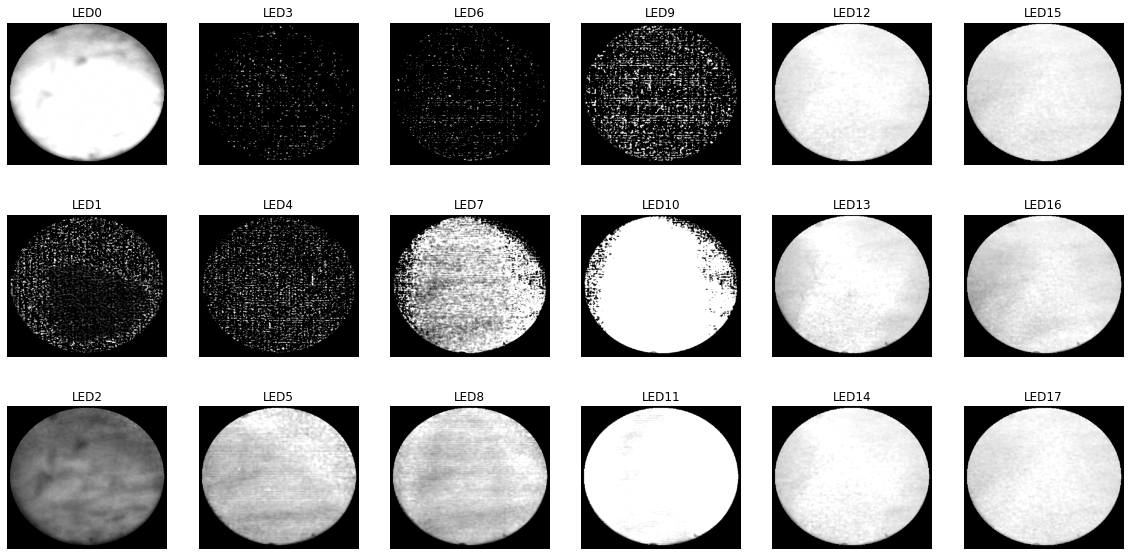

In [9]:
def set_figure_size():
    plt.figure(figsize=(20,10))

# [data_Gnum][NumOfPicture(LED)][picture(480*640*3)]
for Gnum in range(data_Gnum):
    print(" group {} ==================================".format(Gnum))

    set_figure_size()
    figure_index = 0
    for col in range(6):
        for row in range(3):
            plt.subplot(3,6,col+1+row*6)
            plt.axis("off")
            plt.title("LED{}".format(figure_index))

            # plt.imshow(data[Gnum][:,:,figure_index], plt.cm.gray, vmax=1.0)
            plt.imshow(reflectivity[Gnum][:,:,figure_index], plt.cm.gray, vmax=1.0)
            figure_index += 1
    plt.show()
    break


# del data witch we don't want

 group 0 ==================================


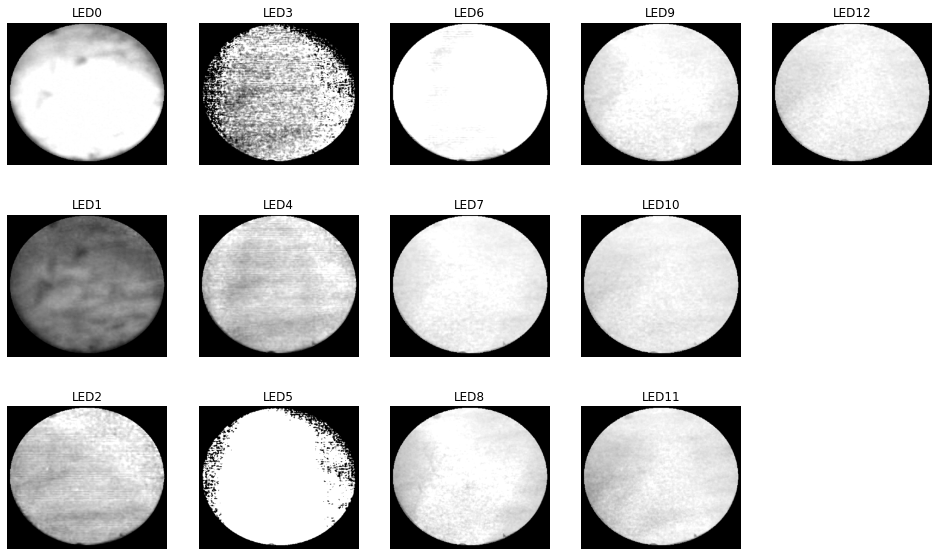

In [10]:
reflectivity_process = reflectivity
del reflectivity
reflectivity_process = np.delete(reflectivity_process,9,3)
reflectivity_process = np.delete(reflectivity_process,6,3)
reflectivity_process = np.delete(reflectivity_process,4,3)
reflectivity_process = np.delete(reflectivity_process,3,3)
reflectivity_process = np.delete(reflectivity_process,1,3)

def set_figure_size():
    plt.figure(figsize=(20,10))

# [data_Gnum][NumOfPicture(LED)][picture(480*640*3)]
for Gnum in range(data_Gnum):
    if(Gnum==1):
        break

    print(" group {} ==================================".format(Gnum))
    set_figure_size()
    figure_index = 0
    for col in range(6):
        for row in range(3):
            if(figure_index==13):
                break
            plt.subplot(3,6,col+1+row*6)
            plt.axis("off")
            plt.title("LED{}".format(figure_index))
            plt.imshow(reflectivity_process[Gnum][:,:,figure_index], plt.cm.gray, vmax=1.0)
            figure_index += 1
    plt.show()


# OSP

# t-SNE

In [13]:
# transpose and reshape tSNE_data_p
print(reflectivity_process.shape)
tSNE_data_p = reflectivity_process #[:60]
# (group,x,y,band) = tSNE_data_p.shape
# tSNE_data_p = tSNE_data_p.reshape(group,band,x*y)



tSNE_data_p = tSNE_data_p.transpose(0,3,1,2)
(group,band,x,y) = tSNE_data_p.shape
tSNE_data_p = tSNE_data_p.reshape(group,band,x*y)
(group,band,xy) = tSNE_data_p.shape
tSNE_data_p = tSNE_data_p.reshape(group,band*xy)
print(tSNE_data_p.shape)
# plt.imshow(tSNE_data_p[0],plt.cm.gray,vmax=1)
# plt.show()


(144, 375, 420, 13)


(144, 2047500)


In [18]:
n_components = 2
perplexity = 120
early_exaggeration = 12.0
learning_rate = 70
n_iter = 400000
n_iter_without_progress = 300
min_grad_norm = 1e-07
metric = 'euclidean'
init = 'pca'
verbose = 1
random_state = None
method = 'barnes_hut'
angle = 0.5
n_jobs = None

tsne = manifold.TSNE(n_components=n_components, perplexity=perplexity, early_exaggeration=early_exaggeration,\
                     learning_rate=learning_rate, n_iter=n_iter, n_iter_without_progress=n_iter_without_progress,\
                     min_grad_norm=min_grad_norm, metric=metric, init=init, verbose=verbose,\
                     random_state=random_state, method=method, angle= angle, n_jobs=n_jobs)
tSNE_data = tsne.fit_transform(tSNE_data_p)
file_name = "t-SNE_144_n{}_per{}_lr{}_iter{}".format(n_components,perplexity,learning_rate,n_iter)

print("\nOrg data dimension is {}\n\
Embedded data dimension is {}".format(tSNE_data_p.shape, tSNE_data.shape))

'''嵌入空间可视化'''
data_min, data_max = tSNE_data.min(0), tSNE_data.max(0)
data_norm = (tSNE_data - data_min) / (data_max - data_min)  # 归一化


[t-SNE] Computing 143 nearest neighbors...


[t-SNE] Indexed 144 samples in 0.384s...


[t-SNE] Computed neighbors for 144 samples in 1.293s...
[t-SNE] Computed conditional probabilities for sample 144 / 144
[t-SNE] Mean sigma: 38.759961


[t-SNE] KL divergence after 250 iterations with early exaggeration: 47.593609


[t-SNE] KL divergence after 1000 iterations: 0.110212

Org data dimension is (144, 2047500)
Embedded data dimension is (144, 2)


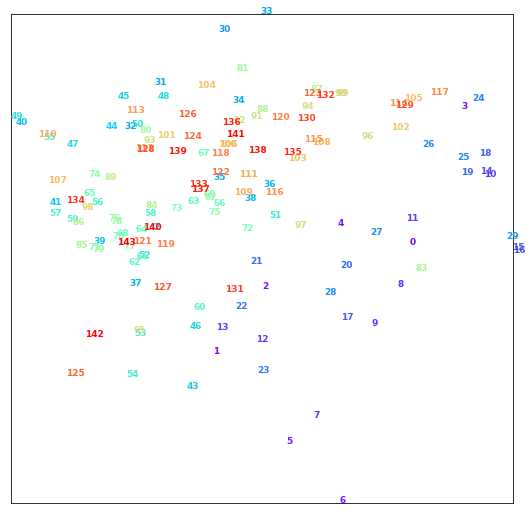

In [19]:
# 2d
%matplotlib inline
colormap = plt.cm.rainbow(np.linspace(0, 1, data_norm.shape[0]))
plt.figure(figsize=(9, 9))
for i in range(data_norm.shape[0]):
    plt.text(data_norm[i, 0], data_norm[i, 1], str(i), color=colormap[i],
             fontdict={'weight': 'bold', 'size': 9})
plt.xticks([]); plt.yticks([]);
plt.savefig('d:/Special_topic/program/t-SNE_result/{}.png'.format(file_name))
plt.show()

# 3D
%matplotlib qt
colormap = plt.cm.rainbow(np.linspace(0, 1, data_norm.shape[0]))
plt.figure(figsize=(12, 12))
ax = plt.subplot(111, projection='3d')
for i in range(data_norm.shape[0]):
    ax.text(data_norm[i,0], data_norm[i,1], data_norm[i,2],str(i), color=colormap[i])
    # ax.scatter(data_norm[i,0], data_norm[i,1], data_norm[i,2],str(i), cmap=colormap[i])

plt.savefig('d:/Special_topic/program/t-SNE_result/{}.png'.format(file_name))
plt.show()
